In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import mannwhitneyu, pearsonr, spearmanr


In [2]:
df = pd.read_excel('Training.xlsx')

In [3]:
df.head()

ID         A         B      C       D         E         F   G     H      I  \
0   1  0.198778  0.099389   0.00  799.90  1.777556  0.888778  13  3.49  Woman   
1   2  0.043000  0.021264  49.97  173.03  0.384511  0.190143  13  3.49  Woman   
2   3  0.067073  0.067073   0.00  329.90  0.599818  0.599818  13  3.49  Woman   
3   4  0.052700  0.052700   0.00  235.65  0.471300  0.471300  13  3.49  Woman   
4   5  0.141880  0.141880   0.00  634.45  1.268900  1.268900  13  3.49  Woman   

   ...       P          Q   R          S    T    U    V    W   X MARKER  
0  ...   2 Two   property  No      Works  Yes  Yes   No  Yes  No      0  
1  ...   2 Two  otherwise  No      Works  Yes  Yes  Yes  Yes  No      0  
2  ...   1 One   property  No  No couple   No  Yes   No  Yes  No      0  
3  ...  0 Zero   property  No  No couple  Yes  Yes  Few  Yes  No      0  
4  ...  0 Zero   property  No  No couple  Yes   No   No   No  No      0  

[5 rows x 26 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89734 entries, 0 to 89733
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      89734 non-null  int64  
 1   A       89734 non-null  float64
 2   B       89734 non-null  float64
 3   C       89734 non-null  float64
 4   D       89734 non-null  float64
 5   E       89734 non-null  float64
 6   F       89734 non-null  float64
 7   G       89734 non-null  int64  
 8   H       89734 non-null  float64
 9   I       89734 non-null  object 
 10  J       89734 non-null  float64
 11  K       89734 non-null  object 
 12  L       89734 non-null  int64  
 13  M       89734 non-null  object 
 14  N       89734 non-null  object 
 15  O       89734 non-null  object 
 16  P       89734 non-null  object 
 17  Q       89734 non-null  object 
 18  R       89734 non-null  object 
 19  S       89734 non-null  object 
 20  T       89734 non-null  object 
 21  U       89734 non-null  object 
 22

In [6]:
# Выкинем Id
ID = df.ID
df = df.drop('ID', axis=1)

In [7]:
df.groupby('MARKER')['A'].agg('count')

MARKER
0    89392
1      342
Name: A, dtype: int64

In [8]:
# Сильный дисбаланс классов
342/89392

0.003825845713262932

In [10]:
#количественные фичи
q_features = list(set(df.describe().columns) - set(['L','H']))


In [11]:
df_pos = df[df.MARKER == 1]
df_neg = df[df.MARKER == 0]

In [12]:
df_pos[q_features].describe()

D           J           E           F  MARKER           B  \
count   342.000000  342.000000  342.000000  342.000000   342.0  342.000000   
mean    796.529386   36.975877    1.442544    1.163732     1.0    0.134099   
std     478.851536   10.313915    0.955115    0.859434     0.0    0.108194   
min      67.420000   21.000000    0.160729    0.110306     1.0    0.015127   
25%     423.037500   29.000000    0.794885    0.599969     1.0    0.066589   
50%     699.135000   35.500000    1.248609    0.978847     1.0    0.106225   
75%    1114.225000   42.729167    1.811387    1.445341     1.0    0.158781   
max    2748.960000   64.000000    6.108800    6.108800     1.0    0.822660   

                G          C           A  
count  342.000000  342.00000  342.000000  
mean    11.719298   93.94114    0.166924  
std      3.945023  120.58608    0.124639  
min      2.000000    0.00000    0.015127  
25%     11.000000    0.00000    0.086569  
50%     13.000000   60.01000    0.136660  
75%     13.000000  127.94500    0.208125  
max     24.000000  957.35000    0.822660

In [13]:
df_neg[q_features].describe()

D             J             E             F   MARKER  \
count  89392.000000  89392.000000  89392.000000  89392.000000  89392.0   
mean     547.559062     41.156712      1.009805      0.681803      0.0   
std      448.306375     11.130044      0.910022      0.620258      0.0   
min       49.980000     21.000000      0.000016      0.000012      0.0   
25%      227.030000     32.083333      0.405025      0.262914      0.0   
50%      407.570000     40.083333      0.748573      0.498356      0.0   
75%      744.325000     50.000000      1.332000      0.897981      0.0   
max     4999.000000     64.916667     35.337000     10.352991      0.0   

                  B             G             C             A  
count  89392.000000  89392.000000  89392.000000  89392.000000  
mean       0.113432      7.839572     85.770124      0.167867  
std        0.105321      4.751406    105.303884      0.153953  
min        0.000001      2.000000      0.000000      0.000002  
25%        0.042905      4.000000     20.700000      0.065797  
50%        0.079642      5.000000     50.020000      0.119019  
75%        0.146867     13.000000    108.750000      0.220043  
max        0.874025     24.000000   2682.420000      7.067250

In [14]:
for i in q_features:
    print(i,mannwhitneyu(df_pos[i], df_neg[i]))

D MannwhitneyuResult(statistic=20714350.5, pvalue=7.16124165540229e-30)
J MannwhitneyuResult(statistic=11993863.0, pvalue=5.76171463292333e-12)
E MannwhitneyuResult(statistic=20597356.5, pvalue=1.1423301712804112e-28)
F MannwhitneyuResult(statistic=21919817.0, pvalue=9.0771432804898e-44)
MARKER MannwhitneyuResult(statistic=30572064.0, pvalue=0.0)
B MannwhitneyuResult(statistic=18132671.0, pvalue=2.6230797303395083e-09)
G MannwhitneyuResult(statistic=22372082.0, pvalue=7.04097193535944e-52)
C MannwhitneyuResult(statistic=14947882.0, pvalue=0.4792543242944358)
A MannwhitneyuResult(statistic=16465118.5, pvalue=0.01366319346775958)


In [15]:
#У пепеменной C критерий Манна-Уинти не отвергает гипотезу о разнице средних. 

In [16]:
df = df.sort_values('MARKER', ascending=True)

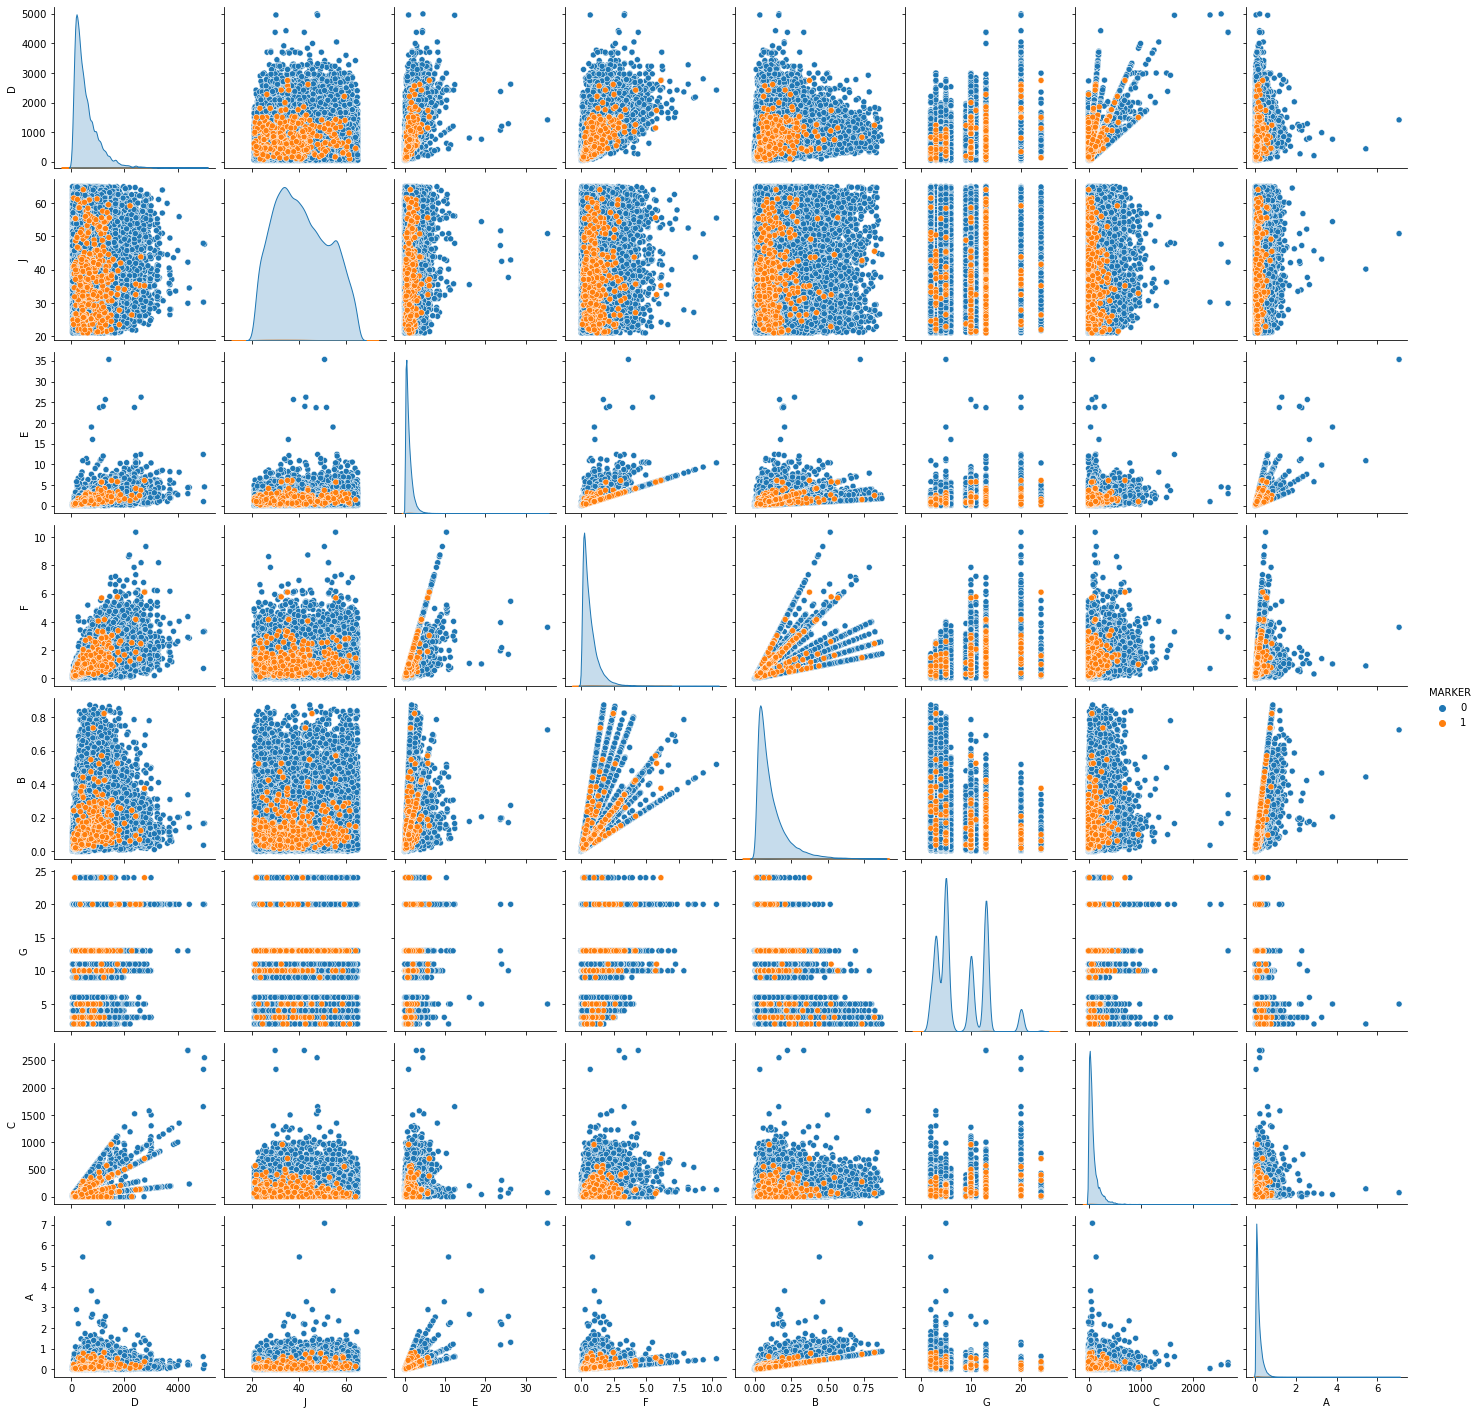

In [17]:
sns.pairplot(df[list(q_features)],hue='MARKER')

In [78]:
# Обрежем данные избавясь от выбросов в размере 3 стандартных отклонений по каждой количественной фичи
border_right = df[list(set(q_features)-{'MARKER'})].mean()+df[list(set(q_features)-{'MARKER'})].std()*3
border_left = df[list(set(q_features)-{'MARKER'})].mean()-df[list(set(q_features)-{'MARKER'})].std()*3

In [141]:
df_fltr = df.copy()
for q in list(set(q_features)-{'MARKER'}):
    print(q)
    df_fltr = df_fltr[df_fltr[q]<=border_right[q]]
    df_fltr = df_fltr[df_fltr[q]>border_left[q]]

D
J
E
G
B
F
C
A


In [101]:
df_fltr = df_fltr.sort_values('MARKER', ascending=True)
df_fltr.shape

(82634, 25)

In [102]:
df_fltr['MARKER'].sum()/df_fltr.shape[0]

0.0035941622092601107

In [24]:
df_fltr['MARKER'].sum()

297

In [25]:
sns.pairplot(df_fltr[list(q_features)],hue='MARKER')

Убрали выборсы. Мы видем, что переменные А-В,E-F имеют большой кластер данных с четкой линейной зависимоти. 


In [80]:
strange_lst_feature = ['A','B','E','F', 'MARKER']
df_fltr_line = df_fltr[(df_fltr['A']==df_fltr['B'])|(df_fltr['E']==df_fltr['F'])]
df_fltr_not_line = df_fltr[(df_fltr['A']!=df_fltr['B'])|(df_fltr['E']!=df_fltr['F'])]
print(df_fltr_line.shape)

(32928, 25)


In [81]:
print(df_fltr_line['MARKER'].sum()/df_fltr['MARKER'].sum())

0.6161616161616161


Почти половина данных имеют особенность (A=B и E=F), но при этом 62% положительных исходов находятся в это1 трети данных. Возможно это связанно с недостаточном количестве данных при сборе

In [28]:
sns.pairplot(df_fltr_line[q_features], hue='MARKER')

In [29]:
# Также мы видим, что у на графиках F-A и F-B есть несколько различных класстеров. Возможно это связано с признаком G

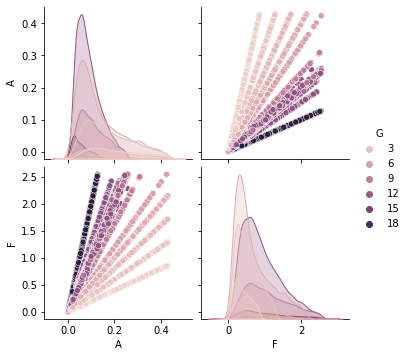

In [82]:
sns.pairplot(df_fltr_line[['A','F','G']], hue='G')

In [31]:
print(pearsonr(df_fltr_line['A'],df_fltr_line['F']))

(0.6111312020816191, 0.0)


In [83]:
for g_values in set(df_fltr_line['G']):
    temp = df_fltr_line[df_fltr_line['G']==g_values]
    print(g_values,temp.shape[0],spearmanr(temp['A'],temp['F']))

2 1692 SpearmanrResult(correlation=0.999999070389092, pvalue=0.0)
3 5332 SpearmanrResult(correlation=0.9999995775378047, pvalue=0.0)
4 1385 SpearmanrResult(correlation=0.9999998644954979, pvalue=0.0)
5 9220 SpearmanrResult(correlation=0.9999999608051867, pvalue=0.0)
6 586 SpearmanrResult(correlation=0.9999998360075691, pvalue=0.0)
9 180 SpearmanrResult(correlation=0.9998415557985947, pvalue=2.2583470206e-313)
10 3912 SpearmanrResult(correlation=0.9999998012127427, pvalue=0.0)
11 253 SpearmanrResult(correlation=0.9999949979854541, pvalue=0.0)
13 9427 SpearmanrResult(correlation=0.9932803054266032, pvalue=0.0)
20 941 SpearmanrResult(correlation=0.9999993195192034, pvalue=0.0)


In [70]:
# Мы видим, что действительно очень похоже, что эти кластеры зависят от G 

In [34]:
# отмаштабируем данные
from sklearn.preprocessing import MinMaxScaler

In [142]:
scaler = MinMaxScaler()
scaler.fit(df_fltr[q_features])
df_fltr[q_features] = scaler.transform(df_fltr[q_features])

In [36]:
sns.pairplot(df_fltr[q_features], hue='MARKER')

In [143]:
#Добавим признак который бы связывал переменную G-A
df_fltr['AG'] = df_fltr['A']*df_fltr['G']

In [105]:
print(mannwhitneyu(df_fltr[df_fltr['MARKER']==1]['AG'],df_fltr[df_fltr['MARKER']==0]['AG']))

MannwhitneyuResult(statistic=18324343.0, pvalue=6.036471952778318e-50)


In [106]:
print(df_fltr[df_fltr['MARKER']==1]['AG'].describe())
print(df_fltr[df_fltr['MARKER']==0]['AG'].describe())

count    297.000000
mean       0.108546
std        0.065485
min        0.000000
25%        0.060613
50%        0.098533
75%        0.151029
max        0.368822
Name: AG, dtype: float64
count    82337.000000
mean         0.056661
std          0.053816
min          0.000000
25%          0.017434
50%          0.039061
75%          0.080677
max          0.368850
Name: AG, dtype: float64


In [41]:
# Переменная действительно хорошо разделяет Классы

# Категориальные признаки

In [42]:
c_features = list(set(df.columns)-set(q_features))
df_fltr[c_features].head()

N               K  \
0    Secondary education (plus special education)  Mogilev region   
97   Secondary education (plus special education)           Minsk   
98                 Higher education (one or more)    Gomel region   
99   Secondary education (plus special education)           Minsk   
101  Secondary education (plus special education)  Vitebsk region   

                    O         Q      I    L          S       P     H  \
0             Married  property  Woman  132      Works   2 Two  3.49   
97            Married  property  Woman   24      Works   1 One  2.49   
98   Single/unmarried  property  Woman  402  No couple  0 Zero  2.49   
99            Married  property  Woman   96      Works   1 One  2.49   
101           Married  property    Man   36      Works   2 Two  2.49   

                               M    U    V    W   X    R    T  
0                    NE employee  Yes   No  Yes  No   No  Yes  
97                   NE employee   No   No   No  No   No  Yes  
98   Head/Deputy head (division)  Yes   No  Yes  No   No  Yes  
99                   NE employee  Yes   No  Yes  No  Yes  Yes  
101                  NE employee  Yes  Yes   No  No   No  Yes

In [43]:
cat_features = df[c_features].nunique()
cat_nun_series = cat_features[cat_features==2]
not_binary_features = cat_features[cat_features!=2]
binary_features = list(cat_nun_series.index)
not_binary_features = list(not_binary_features.index)

In [44]:
df_fltr[binary_features].head()

I    U    W   X    R    T
0    Woman  Yes  Yes  No   No  Yes
97   Woman   No   No  No   No  Yes
98   Woman  Yes  Yes  No   No  Yes
99   Woman  Yes  Yes  No  Yes  Yes
101    Man  Yes   No  No   No  Yes

In [45]:
for f in binary_features:
    print(df_fltr.groupby(f, as_index=False)['MARKER'].agg('mean'))

       I    MARKER
0    Man  0.004205
1  Woman  0.003073
     U    MARKER
0   No  0.005118
1  Yes  0.003332
     W    MARKER
0   No  0.004634
1  Yes  0.002220
     X    MARKER
0   No  0.004216
1  Yes  0.002567
     R    MARKER
0   No  0.004047
1  Yes  0.001410
     T    MARKER
0   No  0.004207
1  Yes  0.003476


In [46]:
# Признаки W, X, U, R Сильно влияют на результат исхода (Больше чем в 1.5 раза) 

In [47]:
# Rigon
df_fltr.groupby('K')['MARKER'].agg('mean')

K
Brest region      0.003657
Gomel region      0.004632
Grodno region     0.002238
Minsk             0.002966
Minsk region      0.003879
Mogilev region    0.003956
Vitebsk region    0.003950
Name: MARKER, dtype: float64

In [48]:
#work
df_fltr.groupby('S')['MARKER'].agg('mean')

S
No couple     0.006289
Pensioner     0.000474
Student       0.000000
Unemployed    0.003006
Works         0.002593
Name: MARKER, dtype: float64

In [49]:
# position
df_fltr.groupby('M')['MARKER'].agg('mean')

M
Enterpreneur                   0.004459
Head/Deputy head (division)    0.001703
Head/Deputy head (organiz.)    0.005470
NE employee                    0.003785
Pensioner                      0.002037
Name: MARKER, dtype: float64

In [50]:
# Education
df_fltr.groupby('N')['MARKER'].agg('mean')

N
Higher education (one or more)                  0.001229
Incomplete higher education                     0.002328
Primary or lower secondary education            0.006711
Secondary education (plus special education)    0.004813
Name: MARKER, dtype: float64

In [51]:
# Q
df_fltr.groupby('Q')['MARKER'].agg('mean')

Q
otherwise    0.004473
property     0.003433
rent/hire    0.007958
Name: MARKER, dtype: float64

In [52]:
# Married             
df_fltr.groupby('O')['MARKER'].agg('mean')

O
Cohabitation        0.004608
Divorced/widow      0.006128
Married             0.002511
Single/unmarried    0.006710
Name: MARKER, dtype: float64

In [57]:
# P      
print(df_fltr.groupby('P', as_index=False)['MARKER'].agg('mean'))

             P    MARKER
0       0 Zero  0.003274
1        1 One  0.003913
2        2 Two  0.004137
3      3 Three  0.002593
4  More than 3  0.002358


In [58]:
# H          
print(df_fltr.groupby('H', as_index=False)['MARKER'].agg('mean'))

     H    MARKER
0  0.0  0.002436
1  1.0  0.016746


In [54]:
# Изменим признак H, разбива на 2 группы с высокой и низкой вероятности оказаться с маркером 1
fltr = df_fltr['H'].isin([2.99, 2.5, 3.5, 2.49, 1.235])
fltr_not = df_fltr['H'].isin([0.0, 1.0, 1.17, 1.1, 1.32, 1.99, 3.0, 3.49, 0.015, 0.01])
df_fltr.loc[fltr,'H'] = 1
df_fltr.loc[fltr_not,'H'] = 0

             P    MARKER
0       0 Zero  0.003274
1        1 One  0.003913
2        2 Two  0.004137
3      3 Three  0.002593
4  More than 3  0.002358


In [55]:
print(df_fltr.groupby('H', as_index=False)['MARKER'].agg('mean'))

In [56]:
df_fltr.groupby('H')['MARKER'].agg('mean')

H
0.0    0.002436
1.0    0.016746
Name: MARKER, dtype: float64

In [154]:
# Закодируем Категориальные перменные
df_fltr = pd.get_dummies(df_fltr)

In [149]:
# Закодируем H (если есть вероятность 1, если нет то 0)
lst_h = set(df_fltr[df_fltr['MARKER']==1]['L'])
lst_not_h =  set(df_fltr[df_fltr['MARKER']==0]['L']) - lst_h
fltr = df_fltr['L'].isin(lst_h)
fltr_not = df_fltr['L'].isin(lst_not_h)
df_fltr.loc[fltr,'L'] = 1
df_fltr.loc[fltr_not,'L'] = 0

# LOGISTIC REGRESSION 

In [155]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from imblearn.under_sampling import NearMiss

In [156]:
df_fltr.head()

A         B         C         D         E         F         G  \
0      0.315869  0.231388  0.000000  0.407167  0.476288  0.348694  0.611111   
59783  0.620901  0.909677  0.546952  0.450212  0.523494  0.766513  0.166667   
59782  0.092305  0.079033  0.074621  0.119465  0.160770  0.137572  0.611111   
59781  0.088535  0.077827  0.104056  0.063633  0.074655  0.065586  0.166667   
59779  0.129539  0.111638  0.053421  0.194131  0.218389  0.188099  0.444444   

          H         J  L  ...  T_Yes  U_No  U_Yes  V_Few  V_No  V_Yes  W_No  \
0      3.49  0.290323  1  ...      1     0      1      0     1      0     0   
59783  0.00  0.817837  0  ...      1     1      0      0     1      0     1   
59782  1.99  0.335863  1  ...      1     0      1      0     1      0     1   
59781  0.00  0.755218  1  ...      1     0      1      0     1      0     0   
59779  0.00  0.339658  1  ...      1     0      1      0     1      0     1   

       W_Yes  X_No  X_Yes  
0          1     1      0  
59783      0     1      0  
59782      0     0      1  
59781      1     1      0  
59779      0     0      1  

[5 rows x 60 columns]

In [254]:
lr = LogisticRegression(penalty='l2',random_state=42, solver='sag', class_weight='balanced')
y = df_fltr['MARKER']
X = df_fltr.drop('MARKER',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(y_test.sum())

101.0


In [255]:
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', random_state=42, solver='sag')

In [256]:
pred = lr.predict(X_test)

In [260]:
pred.sum() # Большое количество ложно-положительных результатов

5770.0

In [258]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88     27169
         1.0       0.01      0.74      0.03       101

    accuracy                           0.79     27270
   macro avg       0.51      0.77      0.45     27270
weighted avg       1.00      0.79      0.88     27270



In [259]:
print(roc_auc_score(y_test,pred))

0.7664801796164746


Итог. Recall достаточно высокий, но если говорить, о рисках, то я не уверен, что это хорошо, так как можно зря понадеятся на успех. Остальные метрики качества низкие. Это говорит о том, что данные линейно неразделимы. Roc-Auc 0.76, что говорит, о том что модель не случайно разбивает по классам. Варианты решения этой проблемы я вижу 2: 1) Попробовать другие модели. 2) Заняться фиче-инжинерингом. 


Если вам не трудно, то не могли бы вы дать фидбек. Что мне нужно подучить, где обратить внимание и тд. Спасибо! 
https://t.me/dimkazylka
zyldmitry@gmail.com